<a href="https://colab.research.google.com/github/ns-m/data_analysis/blob/main/Boston_sklearn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сначала мы импортируем необходимые библиотеки.

In [ ]:
!pip install witwidget --quiet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import collections
import witwidget
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

Далее мы загрузим данные жилья из фреймворка scikit-learn.

In [ ]:
#boston = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/boston.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2 module/Boston.csv')

In [ ]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
'''
#boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
feature_names = boston.feature_names
print(X.shape)
print(y.shape)
print(feature_names)

#boston.head()
'''

Посмотрим описание данных

In [ ]:
'''
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
'''

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB




*   CRIM: Per capita crime rate by town
*   ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
*   INDUS: Proportion of non-retail business acres per town
*   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX: Nitric oxide concentration (parts per 10 million)
*   RM: Average number of rooms per dwelling
*  AGE: Proportion of owner-occupied units built prior to 1940
*   DIS: Weighted distances to five Boston employment centers
*   RAD: Index of accessibility to radial highways
*   TAX: Full-value property tax rate per 10,000
*   PTRATIO  pupil-teacher ratio by town
*   B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT    % lower status of the population
*   MEDV     Median value of owner-occupied homes in $1000's




Цены на дом указаны переменной MEDV - наша целевая переменнаяа, остальные переменные это функции на основании которого мы будем прогнозировать стоимость дома.
Теперь мы загрузим данные в фрейм данных pandas, используя pd.DataFrame

Мы видим, что целевое значение MEDV отсутствует в данных. Мы создаем новый столбец целевых значений и добавляем его в фрейм данных.

In [ ]:
#boston['MEDV'] = boston_dataset.target

In [ ]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

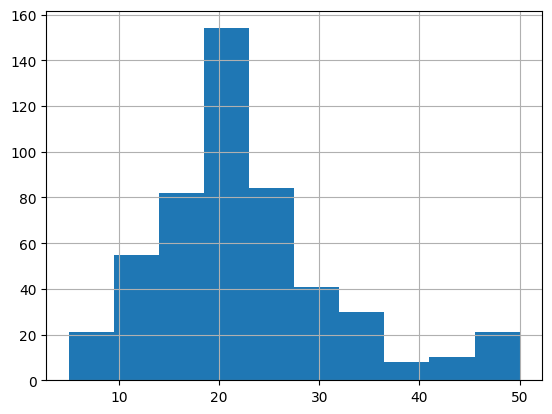

In [ ]:
boston.medv.hist()

In [ ]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
import plotly.express as px
px.histogram(boston, x='crim')

In [ ]:
px.box(boston)

In [ ]:
px.box(boston, x="crim", width=800, height=400)

In [ ]:
px.box(boston, x="zn", width=800, height=400)

In [ ]:
px.box(boston, x="indus", width=800, height=400)

In [ ]:
px.box(boston, x="CHAS", width=800, height=400)

In [ ]:
px.box(boston, x="nox", width=800, height=400)

In [ ]:
px.box(boston, x="rm", width=800, height=400)

In [ ]:
px.box(boston, x="age", width=800, height=400)

In [ ]:
px.box(boston, x="dis", width=800, height=400)

In [ ]:
px.box(boston, x="rad", width=800, height=400)

In [ ]:
px.box(boston, x="tax", width=800, height=400)

In [ ]:
px.box(boston, x="ptratio", width=800, height=400)

Запишем объект в файл со значениями, разделенными запятыми (csv).

In [ ]:
px.box(boston, x="black", width=800, height=400)

In [ ]:
px.box(boston, x="lstat", width=800, height=400)

In [ ]:
px.box(boston, x="medv", width=800, height=400)

In [ ]:
#boston.to_csv('boston.csv', sep = ',', index = False)

In [ ]:
#https://github.com/rosariomoscato/Rosario-Moscato-Lab/tree/main/Regression
# Pairplot
#sns.pairplot(boston)

In [ ]:
corr = boston.corr()
px.imshow(corr,text_auto=True, aspect="auto")

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(boston)
fig.update_layout(
    title='Boston Data set',
    width=1600,
    height=1600,
)

#fig.show()

In [ ]:
#X = boston.drop('MEDV',axis=1)
#y=boston['MEDV']

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 80% vs 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=123)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# initiate the linear model and fit with data
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_train, y_train)))

The R-squared value is: 0.7470 



In [ ]:
list(feature_names)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names),
"Coef": [lm.intercept_] + list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   30.605530  intercept
1   -0.094871       CRIM
2    0.037717         ZN
3    0.021199      INDUS
4    3.136451       CHAS
5  -15.439294        NOX
6    4.361844         RM
7   -0.011712        AGE
8   -1.352293        DIS
9    0.263334        RAD
10  -0.012657        TAX
11  -0.872326    PTRATIO
12   0.007951          B
13  -0.447572      LSTAT


In [ ]:
#%% check performance on test data
predicted = lm.predict(X_test)

In [ ]:
import numpy as np
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
mae

3.140739239077797

In [ ]:
rmse

5.138873157882225

In [ ]:
rae

0.47849527663605285

In [ ]:
rse

0.29653969508710426

In [ ]:
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.7035
Mean Absolute Error: 3.140739
Root Mean Squared Error: 5.138873
Relative Absolute Error: 0.478495
Relative Squared Error: 0.296540


# **RFECV**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
#from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [ ]:
# initiate the linear model
lm = LinearRegression()

In [ ]:
# scale the features
min_mascaler =  preprocessing.MinMaxScaler()
scaled_minmax = min_mascaler.fit_transform(X_train)
scaled_minmaxdf = pd.DataFrame(scaled_minmax, columns = feature_names)

In [ ]:
scaled_minmaxdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000129,0.95,0.027037,0.0,0.029046,0.684806,0.113285,0.592966,0.086957,0.410305,0.468085,0.968228,0.075055
1,0.002638,0.00,0.245926,0.0,0.215768,0.483234,0.420185,0.389363,0.173913,0.190840,0.744681,1.000000,0.305188
2,0.003749,0.22,0.189630,0.0,0.087137,0.488025,0.329557,0.629555,0.260870,0.272901,0.691489,0.983055,0.205022
3,0.000959,0.00,0.372963,0.0,0.049793,0.479785,0.050463,0.377660,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.119877,0.00,0.642963,0.0,0.728216,0.555279,0.946447,0.077428,1.000000,0.914122,0.808511,0.107771,0.613962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.002870,0.00,0.339259,0.0,0.321577,0.471738,0.901133,0.154420,0.130435,0.223282,0.617021,0.998487,0.275662
400,0.010672,0.00,0.274074,0.0,0.309129,0.476336,0.884655,0.301779,0.130435,0.229008,0.893617,0.771748,0.429084
401,0.121703,0.00,0.642963,0.0,0.601660,0.617168,0.905252,0.062105,1.000000,0.914122,0.808511,0.053583,0.663907
402,0.000236,0.00,0.234444,0.0,0.165975,0.547998,0.782698,0.348524,0.043478,0.104962,0.553191,1.000000,0.204470


***robust_scaler***

In [ ]:
from sklearn.preprocessing import RobustScaler
RobustScaler = RobustScaler().fit(X)
robust_scaler = RobustScaler.fit_transform(X_train)
robust_scalerdf = pd.DataFrame(robust_scaler, columns = feature_names)

In [ ]:
robust_scalerdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.075543,5.135135,-0.546646,0.0,-0.770328,1.240455,-1.287392,1.396721,-0.10,0.187661,-0.575758,-0.332960,-0.647015
1,-0.007472,0.000000,-0.090979,0.0,-0.256776,-0.168788,-0.678918,0.679084,0.00,-0.107969,0.212121,0.295078,0.172439
2,0.022653,1.189189,-0.208173,0.0,-0.610556,-0.135298,-0.858601,1.525687,0.10,0.002571,0.060606,-0.039875,-0.184230
3,-0.053022,0.000000,0.173477,0.0,-0.713267,-0.192900,-1.411945,0.637838,-0.05,-0.061697,0.090909,-0.003489,-0.541882
4,3.172983,0.000000,0.735544,0.0,1.152639,0.334896,0.364472,-0.420382,0.95,0.866324,0.393939,-17.341807,1.271923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.001172,0.000000,0.103315,0.0,0.034237,-0.249163,0.274630,-0.149012,-0.05,-0.064267,-0.151515,0.265171,0.067305
400,0.210460,0.000000,-0.032382,0.0,0.000000,-0.217013,0.241960,0.370380,-0.05,-0.056555,0.636364,-4.216822,0.613608
401,3.222500,0.000000,0.735544,0.0,0.804565,0.767582,0.282797,-0.474394,0.95,0.866324,0.393939,-18.412960,1.449767
402,-0.072637,0.000000,-0.114880,0.0,-0.393723,0.283992,0.039816,0.535140,-0.15,-0.223650,-0.333333,0.295078,-0.186195


In [ ]:
# recursive feature elimination with cross validation, using r-squared as metric
rfecv = RFECV(estimator=lm, step=1, cv=10)
rfecv.fit(robust_scalerdf, y_train)

RFECV(cv=10, estimator=LinearRegression())

In [ ]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 13


***scaled_minmax***

In [ ]:
# recursive feature elimination with cross validation, using r-squared as metric
rfecv = RFECV(estimator=lm, step=1, cv=5)
rfecv.fit(scaled_minmaxdf, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 11


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



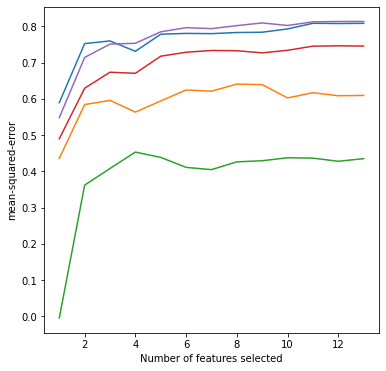

In [ ]:
# plot number of features VS. cross-validation scores
plt.figure(figsize=(6, 6))
plt.xlabel("Number of features selected")
plt.ylabel("mean-squared-error")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [ ]:
# %% fit model с выбранными функциями
#%% fit model with selected features X_train_new = X_train[:,rfecv.support_]
X_train_new = X_train[:,rfecv.support_]
lm2 = LinearRegression()
lm2.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
predicted = lm2.predict(X_train_new)

rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Root Mean Squared Error: {0:0.4f}" .format(rmse))

Root Mean Squared Error: 4.7069


In [ ]:
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

The R-squared value is: 0.7485 



In [ ]:
feature_cols_selected = list(np.array(feature_names)[rfecv.support_])
# print intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + feature_cols_selected ,
"Coef": [lm2.intercept_] + list(lm2.coef_)})

cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   36.303356  intercept
1   -0.118725       CRIM
2    0.039331         ZN
3    2.694339       CHAS
4  -15.013280        NOX
5    3.731285         RM
6   -1.462417        DIS
7    0.299939        RAD
8   -0.011351        TAX
9   -0.980751    PTRATIO
10   0.009011          B
11  -0.539250      LSTAT


In [ ]:
# %% проверить производительность по тестовым данным
#%% check performance on test data
X_test_part = X_test[:,rfecv.support_]
predicted = lm2.predict(X_test_part)

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
# print metrics on test data
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.7485 

Mean Absolute Error: 3.334007
Root Mean Squared Error: 4.621990
Relative Absolute Error: 0.548829
Relative Squared Error: 0.306467


#Ridge regression and classification

In [ ]:
from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=8)

In [ ]:
Ridge.fit(X_train, y_train)

Ridge(alpha=8)

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(Ridge.score(X_train, y_train)))

The R-squared value is: 0.7419 



In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names),
"Coef": [Ridge.intercept_] + list(Ridge.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   28.653901  intercept
1   -0.112126       CRIM
2    0.043728         ZN
3   -0.001191      INDUS
4    2.015203       CHAS
5   -2.052131        NOX
6    3.636108         RM
7   -0.006223        AGE
8   -1.200241        DIS
9    0.284008        RAD
10  -0.013893        TAX
11  -0.864107    PTRATIO
12   0.009261          B
13  -0.584387      LSTAT


In [ ]:
predicted_Ridge = Ridge.predict(X_test)

In [ ]:
mae = np.mean(abs(predicted_Ridge-y_test))
rmse = np.sqrt(np.mean((predicted_Ridge-y_test)**2))
rae = np.mean(abs(predicted_Ridge-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Ridge-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(Ridge.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6672
Mean Absolute Error: 3.434987
Root Mean Squared Error: 4.816762
Relative Absolute Error: 0.565452
Relative Squared Error: 0.332841


##Lasso

In [ ]:
Lasso = linear_model.Lasso(alpha=0.9)
Lasso.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(Lasso.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names),
"Coef": [Lasso.intercept_] + list(Lasso.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

The R-squared value is: 0.7062 

         Coef   Features
0   39.646902  intercept
1   -0.080784       CRIM
2    0.039092         ZN
3   -0.000000      INDUS
4    0.000000       CHAS
5   -0.000000        NOX
6    1.407896         RM
7    0.022093        AGE
8   -0.735588        DIS
9    0.257919        RAD
10  -0.013902        TAX
11  -0.806938    PTRATIO
12   0.007874          B
13  -0.749940      LSTAT


In [ ]:
predicted_Lasso = Lasso.predict(X_test)
mae = np.mean(abs(predicted_Lasso-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_Lasso-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Lasso-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(Lasso.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6330
Mean Absolute Error: 3.533129
Root Mean Squared Error: 5.057773
Relative Absolute Error: 0.581608
Relative Squared Error: 0.366982


##ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=5, l1_ratio = 0.3, random_state=42)
ElasticNetCV.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(ElasticNetCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names),
"Coef": [ElasticNetCV.intercept_] + list(ElasticNetCV.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

The R-squared value is: 0.6687 

         Coef   Features
0   42.138682  intercept
1   -0.078480       CRIM
2    0.041791         ZN
3   -0.000000      INDUS
4    0.000000       CHAS
5   -0.000000        NOX
6    0.363691         RM
7    0.039381        AGE
8   -0.454715        DIS
9    0.257610        RAD
10  -0.014733        TAX
11  -0.643048    PTRATIO
12   0.007161          B
13  -0.800969      LSTAT


In [ ]:
predicted_ElasticNetCV = ElasticNetCV.predict(X_test)
mae = np.mean(abs(predicted_ElasticNetCV-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_ElasticNetCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_ElasticNetCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(ElasticNetCV.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6104
Mean Absolute Error: 3.652101
Root Mean Squared Error: 5.057773
Relative Absolute Error: 0.601193
Relative Squared Error: 0.389563


#SGD (стохастический градиентный спуск)

In [ ]:
#import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
SGD = SGDRegressor(loss="squared_error", penalty="elasticnet", alpha=0.01,
                       l1_ratio=0.4, fit_intercept=True, max_iter=100000, tol=0.01, shuffle=True, verbose=0, random_state=None, learning_rate="invscaling",
                       eta0=0.001, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

In [ ]:
# приведение данных к нормальному закону расределения:
#стандартизация признаков, вычитая среднее значение и масштабируя до единичной дисперсии z = (x-u)/s

SGD_StandardScaler = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
SGD_StandardScaler.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names),
"Coef": [SGD_StandardScaler[1].intercept_[0]] + list(SGD_StandardScaler[1].coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1] # переместить последний элемент на первую позицию (поменять местами столбцы)
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   22.628859  intercept
1   -1.041437       CRIM
2    0.880173         ZN
3    0.214268      INDUS
4    0.687232       CHAS
5   -1.733023        NOX
6    2.759595         RM
7    0.128197        AGE
8   -3.035999        DIS
9    2.398251        RAD
10  -1.704776        TAX
11  -2.174636    PTRATIO
12   0.784012          B
13  -3.967163      LSTAT


In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(SGD_StandardScaler.score(X_train, y_train)))

The R-squared value is: 0.7480 



In [ ]:
predicted_SGD_StandardScaler = SGD_StandardScaler.predict(X_test)
mae = np.mean(abs(predicted_SGD_StandardScaler-y_test))
rmse = np.sqrt(np.mean((predicted_SGD_StandardScaler-y_test)**2))
rae = np.mean(abs(predicted_SGD_StandardScaler-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD_StandardScaler-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(SGD_StandardScaler.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6837
Mean Absolute Error: 3.416127
Root Mean Squared Error: 4.695238
Relative Absolute Error: 0.562348
Relative Squared Error: 0.316258


**MinMaxScaler**

In [ ]:
# используем промасштабируемые данные MinMaxScaler: scaled_minmadf
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# - Это преобразование часто используется как альтернатива масштабированию с нулевым средним значением (мат. ожиданием) и единичной дисперсией (стандратным отклонением).

#SGD_minmadf = SGD.fit(scaled_minmadf, y_train)

вектор весовых коэффициентов модели

In [ ]:
#SGD_minmadf.coef_

свободный коэффициент; то, чему равна
зависимая переменная, если предиктор равен нулю

In [ ]:
#SGD_minmadf.intercept_

In [ ]:
#print("intercept=", SGD_minmadf.intercept_)
#print("coef=", SGD_minmadf.coef_)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
SGD_MinMaxScaler = make_pipeline(MinMaxScaler(),
                    SGDRegressor(max_iter=100000, tol=1e-4))
SGD_MinMaxScaler.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdregressor', SGDRegressor(max_iter=100000, tol=0.0001))])

In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names),
"Coef": [SGD_MinMaxScaler[1].intercept_[0]] + list(SGD_MinMaxScaler[1].coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1] # переместить последний элемент на первую позицию (поменять местами столбцы)
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   16.992849  intercept
1   -4.859804       CRIM
2    2.389233         ZN
3    0.385589      INDUS
4    3.021400       CHAS
5   -2.640606        NOX
6   23.751781         RM
7    1.361333        AGE
8   -7.018883        DIS
9    4.302943        RAD
10  -4.023880        TAX
11  -8.164626    PTRATIO
12   5.654206          B
13 -18.315307      LSTAT


In [ ]:
predicted_SGD_MinMaxScaler = SGD_MinMaxScaler.predict(X_test)
mae = np.mean(abs(predicted_SGD_MinMaxScaler-y_test))
rmse = np.sqrt(np.mean((predicted_SGD_MinMaxScaler-y_test)**2))
rae = np.mean(abs(predicted_SGD_MinMaxScaler-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD_MinMaxScaler-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(SGD_MinMaxScaler.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6731
Mean Absolute Error: 3.284823
Root Mean Squared Error: 4.773745
Relative Absolute Error: 0.540733
Relative Squared Error: 0.326922


#Дерево решений

In [ ]:
!pip install -q dtreeviz
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

     |████████████████████████████████| 72 kB 648 kB/s 


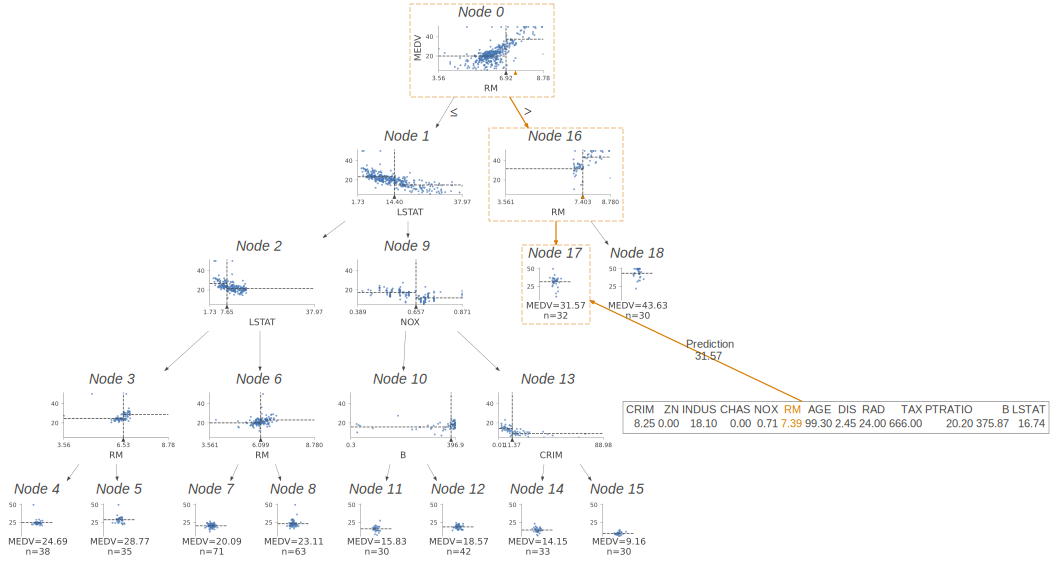

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=4, min_samples_split=30, min_samples_leaf=30)
regr.fit(X_train, y_train)


X = boston_dataset.data[np.random.randint(0, len(boston_dataset.data)),:]

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='MEDV',  # this name will be displayed at the leaf node
               feature_names=boston_dataset.feature_names,
               X=X,
               show_node_labels = True
              )
viz

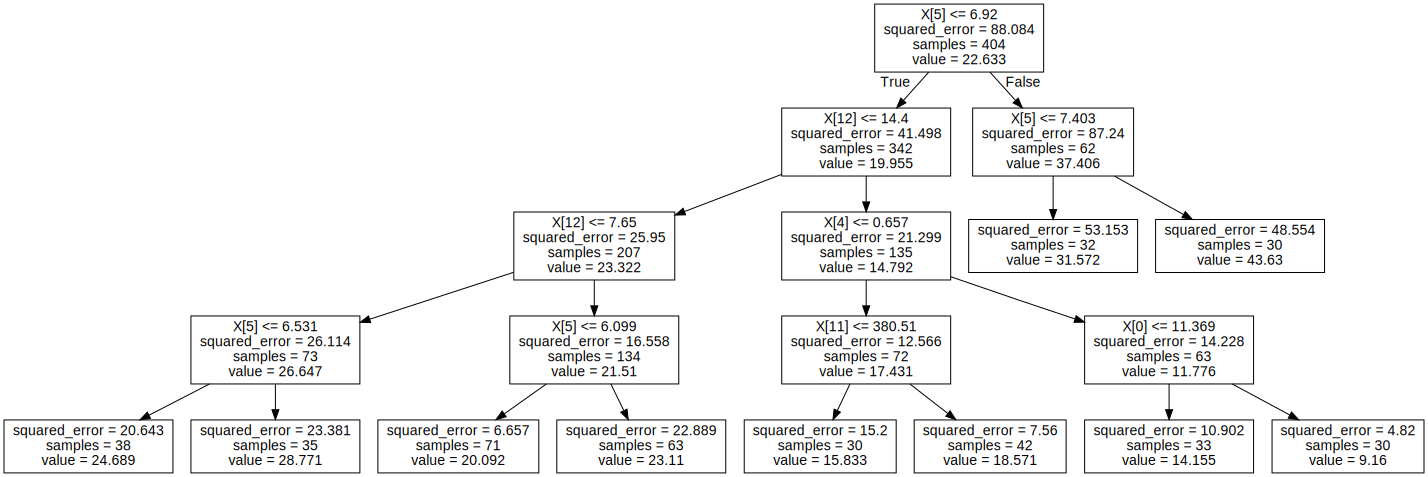

In [ ]:
tree = tree.export_graphviz(regr)
graph = graphviz.Source(tree)
graph

#Bagging

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
Bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                           n_estimators=7,
                           max_features=0.8,
                           bootstrap_features=False,
                           random_state=123).fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(Bagging.score(X_train, y_train)))

The R-squared value is: 0.9705 



In [ ]:
Bagging.estimators_

[DecisionTreeRegressor(random_state=979381764),
 DecisionTreeRegressor(random_state=1540578008),
 DecisionTreeRegressor(random_state=2115349175),
 DecisionTreeRegressor(random_state=745079110),
 DecisionTreeRegressor(random_state=268929039),
 DecisionTreeRegressor(random_state=1421066145),
 DecisionTreeRegressor(random_state=1770928879)]

In [ ]:
Bagging.estimators_features_

[array([11, 10,  3,  5,  9, 12,  7,  2,  1,  6]),
 array([11,  4,  7,  9,  5,  1,  2,  6, 12,  3]),
 array([ 4, 10,  1,  3,  5,  0,  8,  9, 12,  6]),
 array([ 1,  5,  0,  9,  2,  3, 12,  7,  4, 11]),
 array([ 0,  8,  9, 10,  1, 12,  6, 11,  4,  5]),
 array([11,  0,  6,  3,  9,  5,  8,  2,  4,  7]),
 array([ 0,  2,  4,  9,  3,  5, 12,  1,  7,  8])]

In [ ]:
predicted_Bagging = Bagging.predict(X_test)
mae = np.mean(abs(predicted_Bagging-y_test))
rmse = np.sqrt(np.mean((predicted_Bagging-y_test)**2))
rae = np.mean(abs(predicted_Bagging-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Bagging-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(Bagging.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.8897
Mean Absolute Error: 1.892997
Root Mean Squared Error: 2.772853
Relative Absolute Error: 0.311617
Relative Squared Error: 0.110301


# Случайный лес

R2 score on testing data: 90.80%


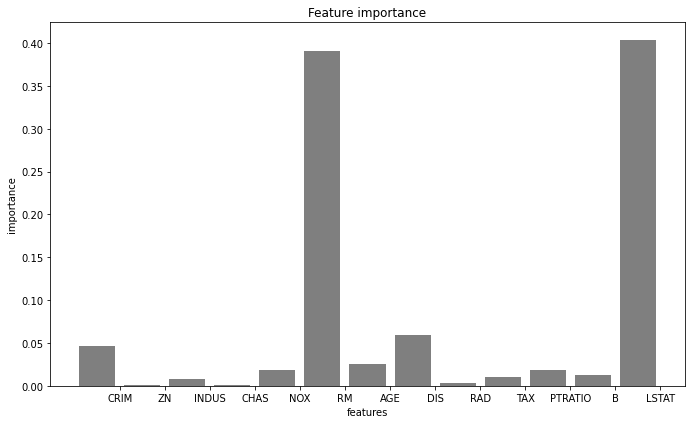

In [ ]:
from sklearn.metrics import r2_score
#Random forest
# =============================================================================
from sklearn.ensemble import RandomForestRegressor

# Fit and predict
rf = RandomForestRegressor(n_estimators=7, random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('R2 score on testing data: {:.2f}%'.format(100*r2_score(y_test, y_pred)))

# Feature selection
feat_imp = rf.feature_importances_


plt.figure(figsize=(6 * 1.618, 6))
feature_names=boston_dataset.feature_names
index = np.arange(len(feature_names))
bar_width = 0.5
plt.bar(index, feat_imp, color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, np.array(feature_names))
plt.tight_layout()
plt.show()
# =============================================================================
#

#Бустинг

##AdaBoost

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=6, random_state=123)
AdaBoost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=6, random_state=123)

In [ ]:
predicted_AdaBoost = AdaBoost.predict(X_test)
print('R2 score on testing data: {:.2f}'.format(r2_score(y_test, predicted_AdaBoost)))
rmse = np.sqrt(mean_squared_error(y_test, predicted_AdaBoost))
print("RMSE: %f" % (rmse))

R2 score on testing data: 0.87
RMSE: 3.435844


# Градиентный бустинг

In [ ]:
#Gradient Boosting Machines
# =============================================================================
import xgboost as xgb
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor
import time

XGBR = XGBRegressor(n_estimators = 7, random_state=1234)
XGBR.fit(X_train, y_train)


# Initialize instances of GBM models
gbm_models = [GradientBoostingRegressor(n_estimators = 10, random_state=1234),
              LGBMRegressor(n_estimators = 10, random_state=1234),
              HistGradientBoostingRegressor(max_iter=10, random_state=1234)]

# Loop over models
for gbm in gbm_models:
    # Measure time
    start_time = time.time()
    # Fit and predict
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    # Print info
    print('Model: {} \n R2 score on testing data: {:.2f}% \n Execution time: {:.2}sec'.format(
          gbm.__class__.__name__, 100*r2_score(y_test, y_pred), time.time()-start_time))

[15:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: GradientBoostingRegressor 
 R2 score on testing data: 72.68% 
 Execution time: 0.017sec
Model: LGBMRegressor 
 R2 score on testing data: 72.91% 
 Execution time: 0.011sec
Model: HistGradientBoostingRegressor 
 R2 score on testing data: 73.38% 
 Execution time: 0.028sec


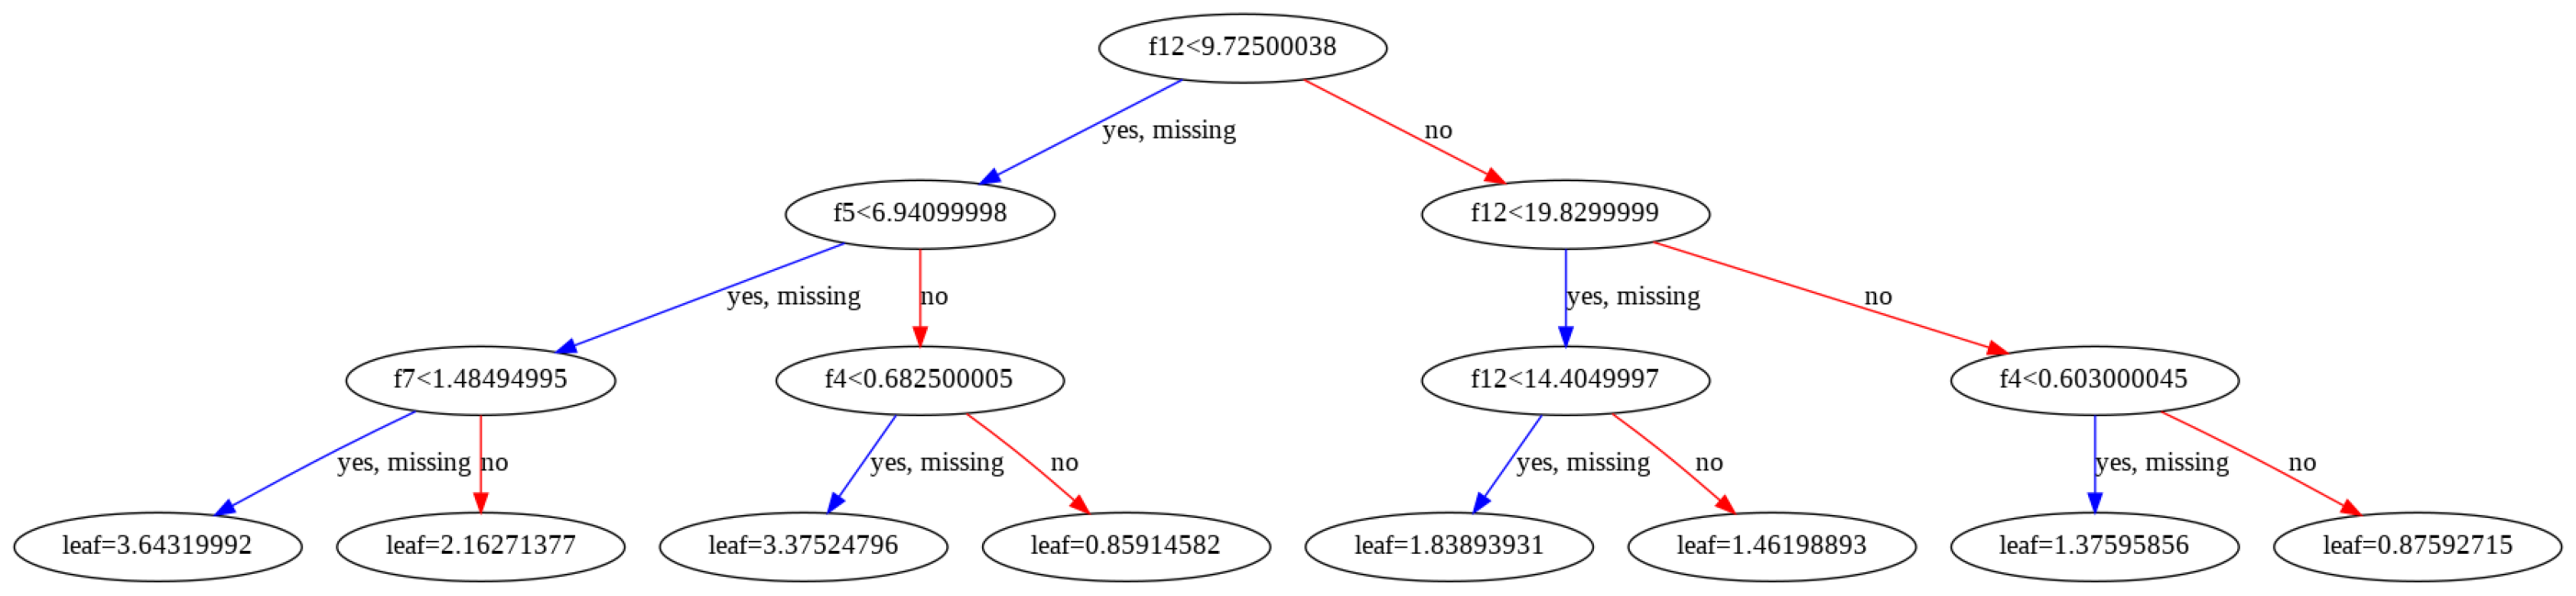

In [ ]:
# plot decision tree
from xgboost import XGBRegressor
from xgboost import plot_tree
import matplotlib.pyplot as plt
# plot single tree
plot_tree(XGBR, num_trees=1)
plt.rcParams['figure.figsize'] = [50, 20]
plt.show()

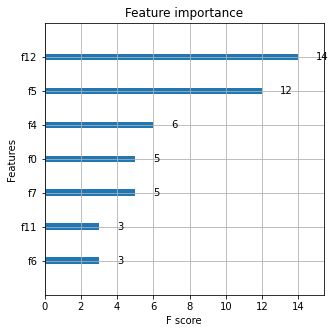

In [ ]:
xgb.plot_importance(XGBR)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()